# Part 2 !! Pandas DataFrame to PostgreSQL using Python

<h3>Create Table in PostgreSQL Database using Python</h3>

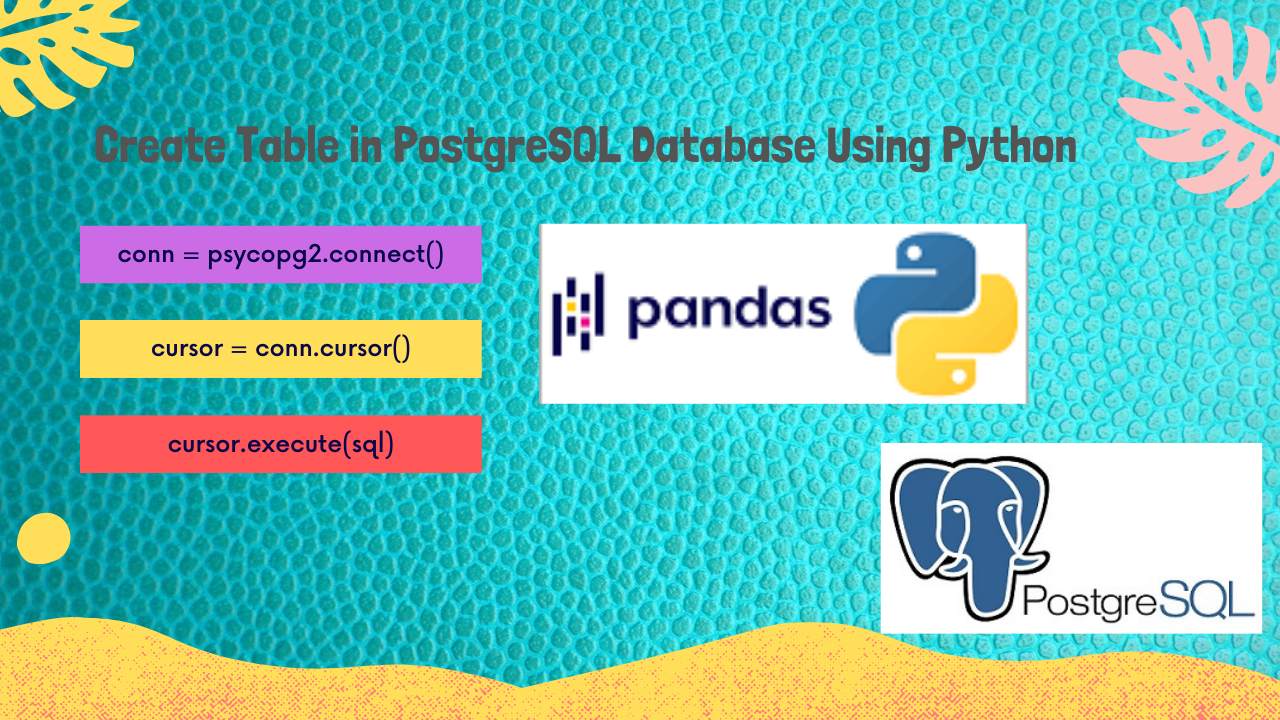

<h3>Prerequisites</h3>

<h4>(a) Python 3.8.3 </h4>

[Anaconda download link](https://www.anaconda.com/products/individual)

<h4>(b) PostgreSQL 13</h4>

[Download link](https://www.postgresql.org/download/)

<b>(c) Psycopg2 : </b> To install <b>Psycopg2</b> use the command: <b>pip install psycopg2</b>

<h3>Connect to the PostgreSQL & Create a Table</h3>

<h3>Step 1: Import the libraries </h3>

In [12]:
# import sys to get more detailed Python exception info
import sys

# import the connect library for psycopg2
import psycopg2

# import the error handling libraries for psycopg2
from psycopg2 import OperationalError, errorcodes, errors

<h3>Step 2: Specify the connection parameters</h3>

In [ ]:
# Note: please change your database, username & password as per your own values

conn_params_dic = {
    "host"      : "localhost",
    "database"  : "irisdb",
    "user"      : "postgres",
    "password"  : "Passw0rd"
}

<h3> Step 3 : Define a function that handles and parses psycopg2 exceptions </h3>

In [14]:
def show_psycopg2_exception(err):
    # get details about the exception
    err_type, err_obj, traceback = sys.exc_info()

    # get the line number when exception occured
    line_n = traceback.tb_lineno

    # print the connect() error
    print ("\npsycopg2 ERROR:", err, "on line number:", line_n)
    print ("psycopg2 traceback:", traceback, "-- type:", err_type)

    # psycopg2 extensions.Diagnostics object attribute
    print ("\nextensions.Diagnostics:", err.diag)

    # print the pgcode and pgerror exceptions
    print ("pgerror:", err.pgerror)
    print ("pgcode:", err.pgcode, "\n")

<h3> Step 4 : Define a connect function to connect to the PostgreSQL database server</h3>

In [16]:
def connect(conn_params_dic):
    conn = None
    try:
        print('Connecting to the PostgreSQL...........')
        conn = psycopg2.connect(**conn_params_dic)
        print("Connection successful..................")
        
    except OperationalError as err:
        # pass exception to function
        show_psycopg2_exception(err)

        # set the connection to 'None' in case of error
        conn = None
    
    return conn

<h3>Step 5. Prepare or identify your data</h3>

To begin, prepare or identify the CSV file that you’d like to import to PostgreSQL database later. For example, I loaded iris data from GitHub.

In [8]:
import pandas as pd
irisData = pd.read_csv('https://github.com/Muhd-Shahid/Write-Raw-File-into-Database-Server/raw/main/iris.csv',index_col=False)
irisData.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Where, data is the comma delimiter. Each line of the CSV file is terminated by a newline character.

First, we will insure that column and datatype parameters in the SQL table that we will create must match the number of columns and data types of the CSV file.

In [9]:
irisData.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

<h3> Step 6 : Create a table named iris in PostgreSQL database </h3>

To create a table using python you need to execute the CREATE TABLE statement using the execute() method of the Cursor of pyscopg2.

In [ ]:
conn = connect(conn_params_dic)
conn.autocommit = True

if conn!=None:
    
    try:
        cursor = conn.cursor();
        # Dropping table iris if exists
        cursor.execute("DROP TABLE IF EXISTS iris;")
        
        sql = '''CREATE TABLE iris(
        sepal_length DECIMAL(2,1) NOT NULL, 
        sepal_width DECIMAL(2,1) NOT NULL, 
        petal_length DECIMAL(2,1) NOT NULL, 
        petal_width DECIMAL(2,1),
        species CHAR(11)NOT NULL
        )'''
        
        # Creating a table
        cursor.execute(sql);
        print("iris table is created successfully..................")
    
        # Closing the cursor & connection
        cursor.close()
        conn.close()
        
    except OperationalError as err:
        # pass exception to function
        show_psycopg2_exception(err)
        # set the connection to 'None' in case of error
        conn = None

<b>Conclusion : </b> This ends our Part 2 on Create a Table. In this tutorial we have learned how to create table in PostgreSQL database using python.

<h4> Next : Part 3 - Insert Data in PostgreSQL Database using Python</h4>

<b>Stay Positive !! Stay Safe !! Keep Learning :):)